MAE: 12.363865151235563
RMSE: 16.1920480712336
Saved: ltv_predictions.csv


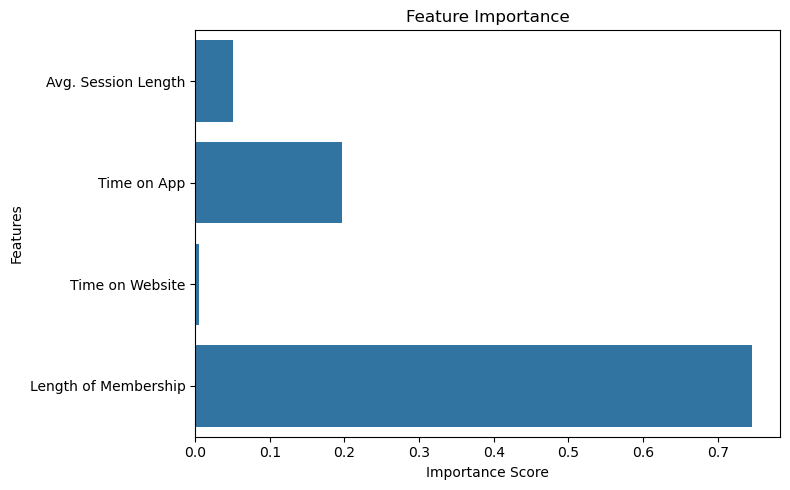

In [3]:
# Step 1: Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Step 2: Load the dataset
df = pd.read_csv("Ecommerce Customers.csv")

# Step 3: Select features and target variable
features = df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
target = df['Yearly Amount Spent']

# Step 4: Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Step 5: Train the XGBoost Regressor
model = XGBRegressor(objective='reg:squarederror', random_state=42)
model.fit(X_train, y_train)

# Step 6: Make predictions and evaluate
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("MAE:", mae)
print("RMSE:", rmse)

# Step 7: Predict CLV for all customers
df['Predicted CLV'] = model.predict(features)

# Step 8: Segment customers based on predicted CLV
quantiles = df['Predicted CLV'].quantile([0.5, 0.8])
def segment_customer(clv):
    if clv >= quantiles[0.8]:
        return 'High'
    elif clv >= quantiles[0.5]:
        return 'Medium'
    else:
        return 'Low'
df['Segment'] = df['Predicted CLV'].apply(segment_customer)

# Step 9: Save predictions to CSV
df[['Email', 'Predicted CLV', 'Segment']].to_csv("ltv_predictions.csv", index=False)
print("Saved: ltv_predictions.csv")

# Step 10: Visualize Feature Importance
plt.figure(figsize=(8, 5))
sns.barplot(x=model.feature_importances_, y=features.columns)
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()
